IMPORTING IMPORTANT LIBRARIES

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

MOUNTING DRIVE

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


FUNCTION DEFINITIONS

In [ ]:
def sigmoid(z):
  return 1/(1 + np.exp(-z))

In [ ]:
def cost_function_L2(X,y,w,lam):
  hypothesis = sigmoid(np.dot(X,w.T))
  J = -1 / len(y) * np.sum(y*np.log(hypothesis)+(1-y)*np.log(1-hypothesis)) + lam*np.sum(w**2)/2
  return J

In [ ]:
def cost_function_L1(X,y,w,lam):
  hypothesis = sigmoid(np.dot(X,w.T))
  J = -1 / len(y) * np.sum(y*np.log(hypothesis)+(1-y)*np.log(1-hypothesis)) + lam*np.abs(np.sum(w))/2
  return J

In [ ]:
def batch_gradient_descent_L2(X,y,w,alpha,iters,lam):
  cost_history = np.zeros(iters)
  for i in range(iters):
    hypothesis = np.dot(X,w.T)
    w = (1-alpha*lam)*w - (alpha/len(y)) * np.dot(hypothesis - y,X)
    cost_history[i] = cost_function_L2(X,y,w,lam)
  return w,cost_history

In [ ]:
def batch_gradient_descent_L1(X,y,w,alpha,iters,lam):
  cost_history = np.zeros(iters)
  for i in range(iters):
    hypothesis = np.dot(X,w.T)
    w = (1-(np.sign(np.sum(w)))*alpha*lam/2)*w - (alpha/len(y)) * np.dot(hypothesis - y,X)
    cost_history[i] = cost_function_L1(X,y,w,lam)
  return w,cost_history

In [ ]:
def mini_batch_gradient_descent_L2(X,y,w,alpha,iters,batch_size,lam):
  cost_history = np.zeros(iters)
  for i in range(iters):
    rand_index = np.random.randint(len(y))
    ind_x = X[rand_index:rand_index + batch_size]
    ind_y = y[rand_index:rand_index + batch_size]
    w = (1-alpha*lam)*w - (alpha/batch_size) * (ind_x.T.dot(ind_x.dot(w) - ind_y))
    cost_history[i] = cost_function_L2(ind_x,ind_y,w,lam)
  return w,cost_history

In [ ]:
def mini_batch_gradient_descent_L1(X,y,w,alpha,iters,batch_size,lam):
  cost_history = np.zeros(iters)
  for i in range(iters):
    rand_index = np.random.randint(len(y))
    ind_x = X[rand_index:rand_index + batch_size]
    ind_y = y[rand_index:rand_index + batch_size]
    w =  (1-np.sign(np.sum(w))*alpha*lam/2)*w - (alpha/batch_size) * (ind_x.T.dot(ind_x.dot(w) - ind_y))
    cost_history[i] = cost_function_L1(ind_x,ind_y,w,lam)
  return w,cost_history

In [ ]:
def stochastic_gradient_descent_L2(X,y,w,alpha,iters,lam):
  cost_history = np.zeros(iters)
  for i in range(iters):
    rand_index = np.random.randint(len(y))
    ind_x = X[rand_index:rand_index + 1]
    ind_y = y[rand_index:rand_index + 1]
    w = (1-alpha*lam)*w - alpha * (ind_x.T.dot(ind_x.dot(w) - ind_y))
    cost_history[i] = cost_function_L2(ind_x,ind_y,w,lam)
  return w,cost_history

In [ ]:
def stochastic_gradient_descent_L1(X,y,w,alpha,iters,lam):
  cost_history = np.zeros(iters)
  for i in range(iters):
    rand_index = np.random.randint(len(y))
    ind_x = X[rand_index:rand_index + 1]
    ind_y = y[rand_index:rand_index + 1]
    w =  (1-np.sign(np.sum(w))*alpha*lam/2)*w - alpha * (ind_x.T.dot(ind_x.dot(w) - ind_y))
    cost_history[i] = cost_function_L1(ind_x,ind_y,w,lam)
  return w,cost_history

DATA PRE-PROCESSING

In [ ]:
from random import Random
data = pd.read_excel("/content/gdrive/MyDrive/NNFL_ASSIGNMENT_1/data_q4_q5.xlsx")
Random(14).shuffle(data.values)
X = data.drop("diagnosis",axis=1)
y = data["diagnosis"]
y = (y == 'B')
m = len(X)
X_train = X[:int(m*0.7)]
X_val = X[int(m*0.7):int(m*0.8)]
X_test = X[int(m*0.8):]
y_train = y[:int(m*0.7)]
y_val = y[int(m*0.7):int(m*0.8)]
y_test = y[int(m*0.8):]

In [ ]:
def Normalise(X):
  mean = X.mean()
  std = np.std(X,axis=0)
  m = len(X)
  X_norm = (X-mean)/std
  X_norm = np.c_[np.ones((m, 1)), X_norm]
  return X_norm
X_norm = Normalise(X_train)

In [ ]:
w = np.zeros(X_norm.shape[1])

# BATCH GRADIENT DESCENT

In [ ]:
alpha = 0.0001
iters = 4000
lam = 0.1
batch_w_L2, J_his_batch_L2 = batch_gradient_descent_L2(X_norm,y_train,w,alpha,iters,lam)

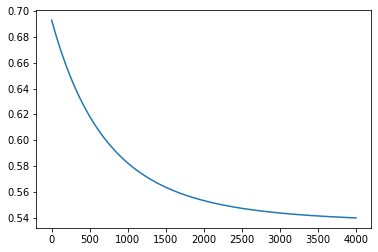

In [ ]:
plt.plot(range(iters),J_his_batch_L2)
plt.show()

In [ ]:
alpha = 0.0001
iters = 4000
lam = 0.1
batch_w_L1, J_his_batch_L1 = batch_gradient_descent_L1(X_norm,y_train,w,alpha,iters,lam)

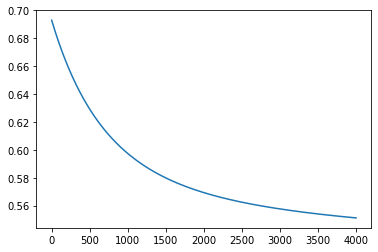

In [ ]:
plt.plot(range(iters),J_his_batch_L1)
plt.show()

EVALUATION METRICS

In [ ]:
TN, FN, TP, FP = 0, 0, 0, 0

y_pred = np.dot(Normalise(X_test), batch_w_L2)
y_pred = sigmoid(y_pred)
y_pred[y_pred > 0.5] = 1
y_pred[y_pred <= 0.5] = 0

TP = np.sum(y_pred * y_test)
FP = np.sum(y_pred * (1-y_test))
FN = np.sum((1-y_pred) * y_test)
TN = np.sum((1-y_pred) * (1-y_test))

sensitivity = TP/(TP + FN)
specificity = TN/(TN + FP)
accuracy = (TP + TN)/(TP + TN + FP + FN)

print('sensitivity :',sensitivity)
print('specificity :',specificity)
print('accuracy :',accuracy*100,'%')

sensitivity : 1.0
specificity : 0.8846153846153846
accuracy : 97.36842105263158 %


In [ ]:
TN, FN, TP, FP = 0, 0, 0, 0

y_pred = np.dot(Normalise(X_test), batch_w_L1)
y_pred = sigmoid(y_pred)
y_pred[y_pred > 0.5] = 1
y_pred[y_pred <= 0.5] = 0

TP = np.sum(y_pred * y_test)
FP = np.sum(y_pred * (1-y_test))
FN = np.sum((1-y_pred) * y_test)
TN = np.sum((1-y_pred) * (1-y_test))

sensitivity = TP/(TP + FN)
specificity = TN/(TN + FP)
accuracy = (TP + TN)/(TP + TN + FP + FN)

print('sensitivity :',sensitivity)
print('specificity :',specificity)
print('accuracy :',accuracy*100,'%')

sensitivity : 1.0
specificity : 0.8846153846153846
accuracy : 97.36842105263158 %


MINI-BATCH GRADIENT DESCENT

In [ ]:
alpha = 0.0001
iters = 4000
batch_size = 50
lam = 0.2
mini_batch_w_L2, J_his_mini_batch_L2 = mini_batch_gradient_descent_L2(X_norm,y_train,w,alpha,iters,batch_size,lam)

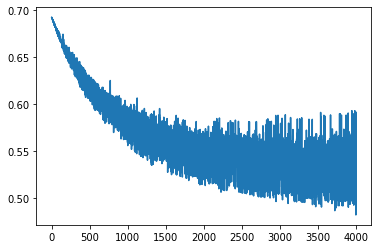

In [ ]:
plt.plot(range(iters),J_his_mini_batch_L2)
plt.show()

In [ ]:
alpha = 0.0001
iters = 4000
batch_size = 50
lam = 0.2
mini_batch_w_L1, J_his_mini_batch_L1 = mini_batch_gradient_descent_L1(X_norm,y_train,w,alpha,iters,batch_size,lam)


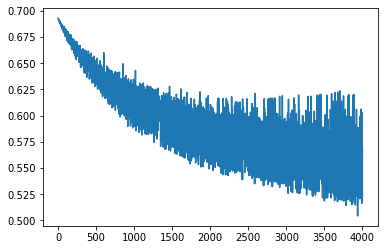

In [ ]:
plt.plot(range(iters),J_his_mini_batch_L1)
plt.show()

EVALUATION METRICS

In [ ]:
TN, FN, TP, FP = 0, 0, 0, 0

y_pred = np.dot(Normalise(X_test), mini_batch_w_L2)
y_pred = sigmoid(y_pred)
y_pred[y_pred > 0.5] = 1
y_pred[y_pred <= 0.5] = 0

TP = np.sum(y_pred * y_test)
FP = np.sum(y_pred * (1-y_test))
FN = np.sum((1-y_pred) * y_test)
TN = np.sum((1-y_pred) * (1-y_test))

sensitivity = TP/(TP + FN)
specificity = TN/(TN + FP)
accuracy = (TP + TN)/(TP + TN + FP + FN)

print('sensitivity :',sensitivity)
print('specificity :',specificity)
print('accuracy :',accuracy*100,'%')

sensitivity : 0.9886363636363636
specificity : 0.8846153846153846
accuracy : 96.49122807017544 %


In [ ]:
TN, FN, TP, FP = 0, 0, 0, 0

y_pred = np.dot(Normalise(X_test), mini_batch_w_L1)
y_pred = sigmoid(y_pred)
y_pred[y_pred > 0.5] = 1
y_pred[y_pred <= 0.5] = 0

TP = np.sum(y_pred * y_test)
FP = np.sum(y_pred * (1-y_test))
FN = np.sum((1-y_pred) * y_test)
TN = np.sum((1-y_pred) * (1-y_test))

sensitivity = TP/(TP + FN)
specificity = TN/(TN + FP)
accuracy = (TP + TN)/(TP + TN + FP + FN)

print('sensitivity :',sensitivity)
print('specificity :',specificity)
print('accuracy :',accuracy*100,'%')

sensitivity : 1.0
specificity : 0.8846153846153846
accuracy : 97.36842105263158 %


STOCHASTIC GRADIENT DESCENT

In [ ]:
alpha = 0.0001
lam = 0.2
iters = 4000
stochastic_w_L2, J_his_stochastic_L2 = stochastic_gradient_descent_L2(X_norm,y_train,w,alpha,iters, lam)

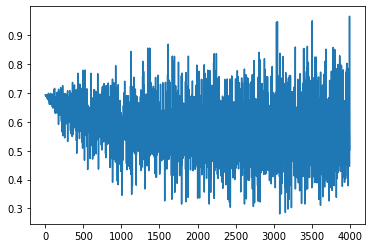

In [ ]:
plt.plot(range(iters),J_his_stochastic_L2)
plt.show()

In [ ]:
alpha = 0.0001
lam = 0.2
iters = 4000
stochastic_w_L1, J_his_stochastic_L1 = stochastic_gradient_descent_L1(X_norm,y_train,w,alpha,iters, lam)

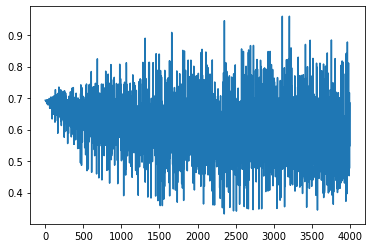

In [ ]:
plt.plot(range(iters),J_his_stochastic_L1)
plt.show()

EVALUATION METRICS

In [ ]:
TN, FN, TP, FP = 0, 0, 0, 0

y_pred = np.dot(Normalise(X_test), stochastic_w_L2)
y_pred = sigmoid(y_pred)
y_pred[y_pred > 0.5] = 1
y_pred[y_pred <= 0.5] = 0

TP = np.sum(y_pred * y_test)
FP = np.sum(y_pred * (1-y_test))
FN = np.sum((1-y_pred) * y_test)
TN = np.sum((1-y_pred) * (1-y_test))

sensitivity = TP/(TP + FN)
specificity = TN/(TN + FP)
accuracy = (TP + TN)/(TP + TN + FP + FN)

print('sensitivity :',sensitivity)
print('specificity :',specificity)
print('accuracy :',accuracy*100,'%')

sensitivity : 1.0
specificity : 0.8846153846153846
accuracy : 97.36842105263158 %


In [ ]:
TN, FN, TP, FP = 0, 0, 0, 0

y_pred = np.dot(Normalise(X_test), stochastic_w_L1)
y_pred = sigmoid(y_pred)
y_pred[y_pred > 0.5] = 1
y_pred[y_pred <= 0.5] = 0

TP = np.sum(y_pred * y_test)
FP = np.sum(y_pred * (1-y_test))
FN = np.sum((1-y_pred) * y_test)
TN = np.sum((1-y_pred) * (1-y_test))

sensitivity = TP/(TP + FN)
specificity = TN/(TN + FP)
accuracy = (TP + TN)/(TP + TN + FP + FN)

print('sensitivity :',sensitivity)
print('specificity :',specificity)
print('accuracy :',accuracy*100,'%')

sensitivity : 1.0
specificity : 0.8846153846153846
accuracy : 97.36842105263158 %
